Importierung der wichtigen Bibliotheken

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
""" import plotly.subplots as make_subplots
import plotly.graph_objects as go """


' import plotly.subplots as make_subplots\nimport plotly.graph_objects as go '

einlesen der Csv Datei

In [3]:
df = pd.read_csv("train.csv")


Balkendiagramm unserer nominale Variablen

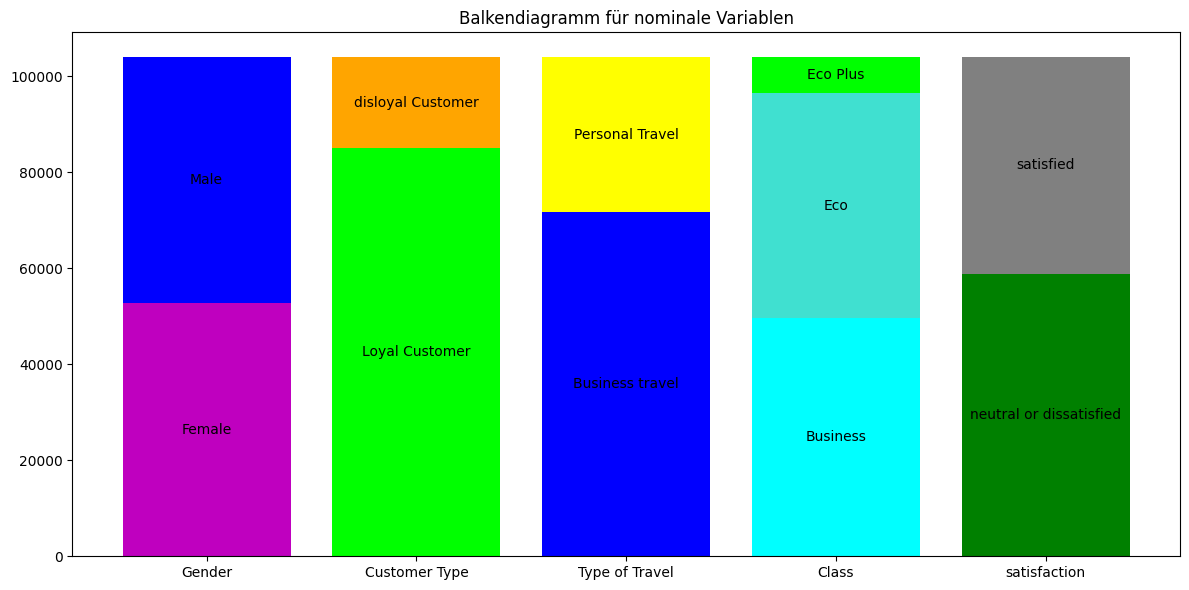

In [4]:
columns = ['Gender','Customer Type', 'Type of Travel', 'Class', 'satisfaction']

x_positions = range(len(columns))

fig, ax = plt.subplots(figsize=[12,6])


palette = {
    'Gender': ['m','b'],
    'Customer Type': ['lime','orange'],
    'Type of Travel': ['blue','yellow'],
    'satisfaction': ['green','gray'],
    'Class': ['cyan', 'turquoise', 'lime']
}

legend_entries = {}

for col_indx, col in enumerate(columns):
    counts = df[col].value_counts()
    bottom = 0
    colors = palette[col]
    
    for i, (cat,val) in enumerate(counts.items()):
        color = colors[i% len(colors)]
        ax.bar(col_indx, val, bottom=bottom, color=color)
        ax.text(col_indx, bottom + val/2, str(cat), ha='center', va='center', color='black')
        bottom += val
        if cat not in legend_entries:
            legend_entries[cat] = color

ax.set_xticks(list(x_positions))
ax.set_xticklabels(columns)

handles = [plt.Rectangle((0,0),1,1, color = color) for color in legend_entries.values()]
labels = list(legend_entries.keys())
plt.title("Balkendiagramm für nominale Variablen")
plt.tight_layout()
plt.show()

### Zur Analyse der nominalen Variablen (wie Geschlecht, Klasse oder Kundentyp) nutzen wir ein gestapeltes Balkendiagramm. Diese Visualisierung bietet einen sofortigen Überblick über die Zusammensetzung unserer Passagierdaten und zeigt auf einen Blick, welche Gruppen im Datensatz dominieren.

## Die relevanten Erkenntnisse für die weitere Analyse sind:

- Geschlecht: Der Datensatz ist sehr ausgewogen; es gibt fast gleich viele Frauen wie Männer.

- Kundentyp: Hier zeigt sich ein deutliches Ungleichgewicht. Etwa 75 % der -Befragten sind loyale Kunden.

- Klasse: Auch hier ist die Verteilung ungleichmäßig. Die Klasse Eco Plus nimmt im Vergleich zu Eco und Business nur einen verschwindend geringen Anteil ein.

- Reisegrund (Type of Travel): Beim Reisegrund dominiert Business Travel gegenüber Personal Travel mit einem Verhältnis von annähernd 2 zu 1.

### Zur Analyse der kategorischen Variablen (wie Gender, Class oder Customer Type) nutzen wir ein gestapeltes Balkendiagramm. Diese Visualisierung bietet uns einen sofortigen Überblick über die Zusammensetzung unserer Passagierdaten und zeigt auf einen Blick, welche Gruppen im Datensatz dominieren.

## Die relevanten Ergebnisse für die weitere Analyse sind:
- Geschlecht: Der Datensatz ist sehr ausgeglichen, es giebt fast gleich viele Männer und Frauen.

- Kundentyp: Hier zeigt sich ein deutliches Ungleichgewicht. Etwa 75% der Befragten sind loyale Kunden.

- Reisegrund: Beim Raisegrund dominiert Buisness travel gegenüber Personal Travel mit einem Verhältniss von 2 zu 1

- Klasse: Auch hier ist die Verteilung ungleichmäßig. Die Klasse Eco Plus nimmt im Vergleich zu Eco und Buisness nur einen verschwindend geringen Anteil ein

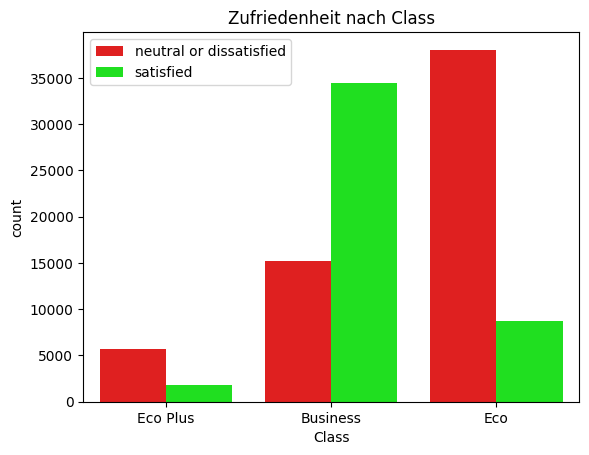

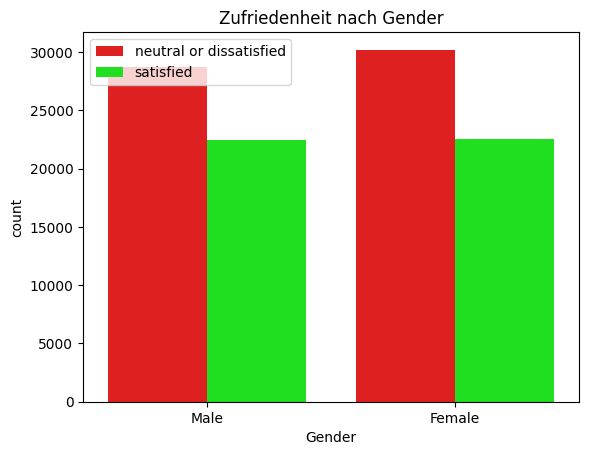

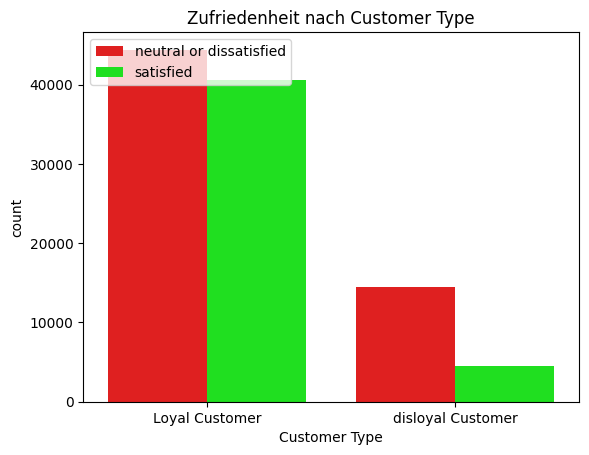

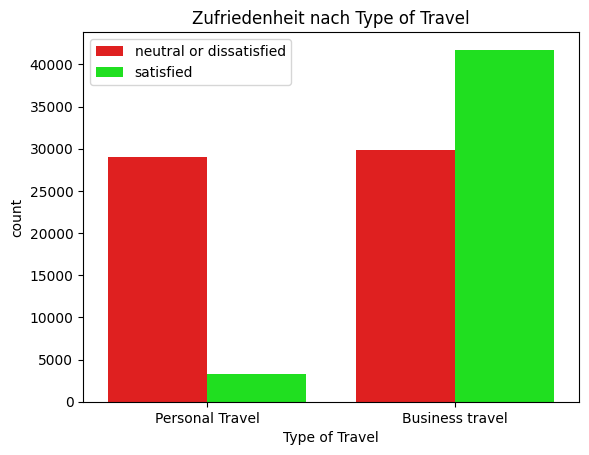

In [5]:
columns = ["Class","Gender","Customer Type","Type of Travel",] #Kategorische Variablen
for column in columns: # Schleife über die kategorischen Variablen
    sns.countplot(x= column, hue = "satisfaction", data = df, palette = ["red", "lime"]) # Erstellen des Countplots
    plt.title(f"Zufriedenheit nach {column}") # Titel des Plots
    plt.legend(loc = "upper left") # Legende oben links
    plt.show() # Anzeigen des Plots

# Zentrale Ergebnisse und Erkentnisse

## Die Balkendiagramme zeigen dwutliche Unterschiede in der Kundenzufriedenheit in Verbindung mit der jeweiligen analysierten Kategorie

### Flugklasse:

Die Buisness Class zeigt eine hohe Zufriedenheit (mehr als 2:1), während die Economy Klassen um extrem unzufrieden sind

### Geschlecht:

Die Zufriedenheit hängt nicht vom Geschlecht ab und bestätigt darüber denalgemeinen Trend, dass die Mehrheit der Kunden eher neutral oder unzufrieden ist.

### Kundenart:

Loyale Kundensind signifikant zufriedener als Disloyale Kunden.

### Reisezweck:

Buisness Travel weißt eine hohe Zufriedenheit auf. Im Gegensatz dazu ist bei Personal Travel nur ein Bruchteil der Reisenden zufrieden, obwohl die Anzahl der Unzufriedenen vergleichbar ist.

# Zentrale Ergebnisse
## Die Balkendiagramme zeigen deutliche Unterschiede in der Kundenzufriedenheit basierend auf den analysierten Faktoren:

### Flugklasse: 
Die Business Class zeigt eine sehr hohe Zufriedenheit (mehr als 2:1), während die Economy Klassen extrem unzufrieden sind.

### Geschlecht: 
Das Zufriedenheitsverhältnis hängt nicht vom Geschlecht ab und bestätigt den allgemeinen Trend, dass die Mehrheit der Kunden eher neutral oder unzufrieden ist.

### Kundenart: 
Loyale Kunden sind signifikant zufriedener als disloyale Kunden.

### Reisezweck: 
Business Travel weist eine hohe Zufriedenheit auf. Im Gegensatz dazu ist bei Personal Travel nur ein Bruchteil der Reisenden zufrieden, obwohl die Anzahl der Unzufriedenen vergleichbar ist.

# Benfords Law

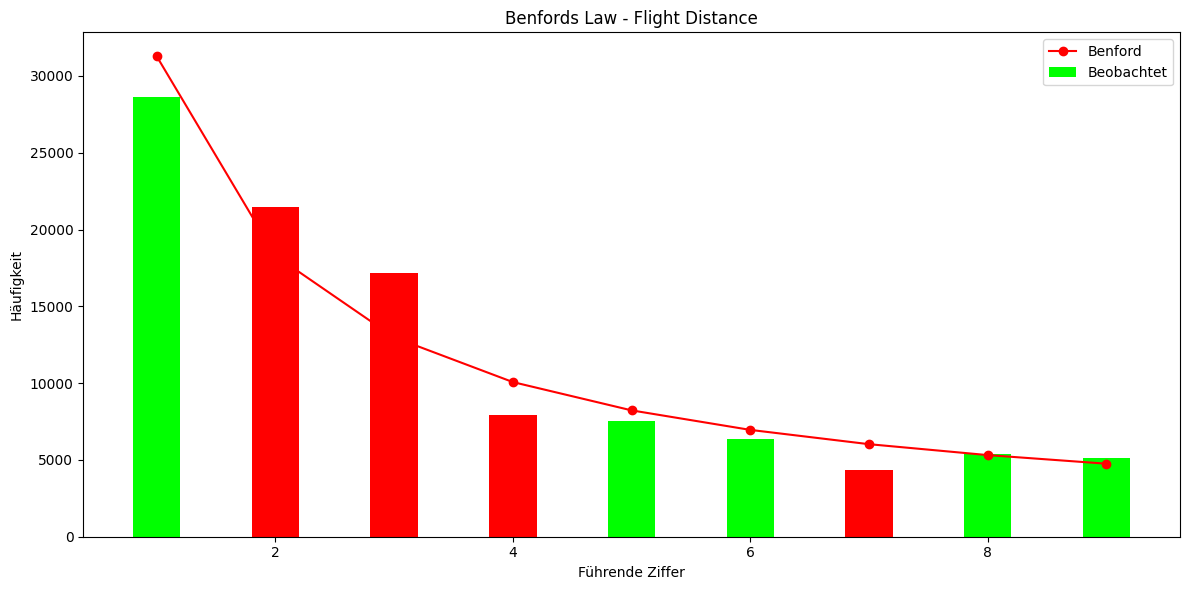

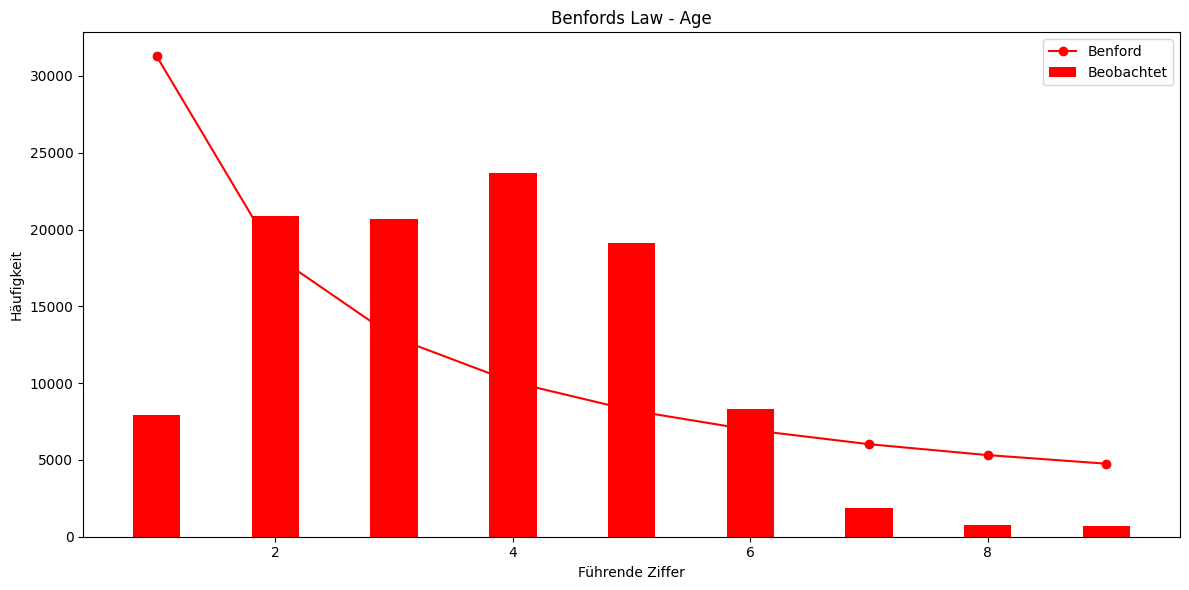

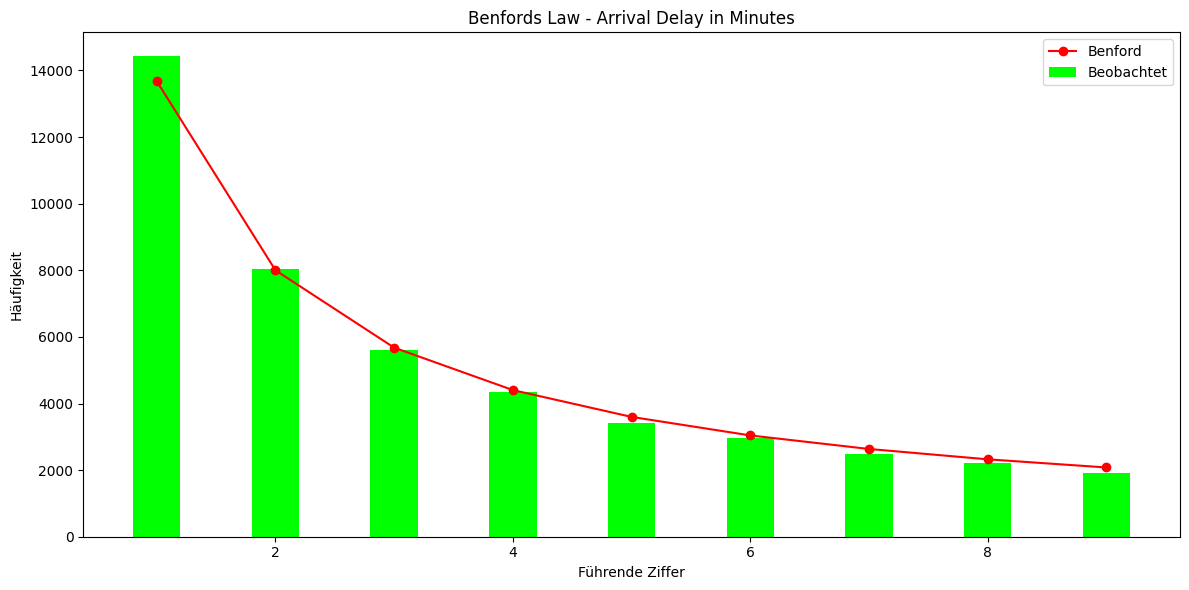

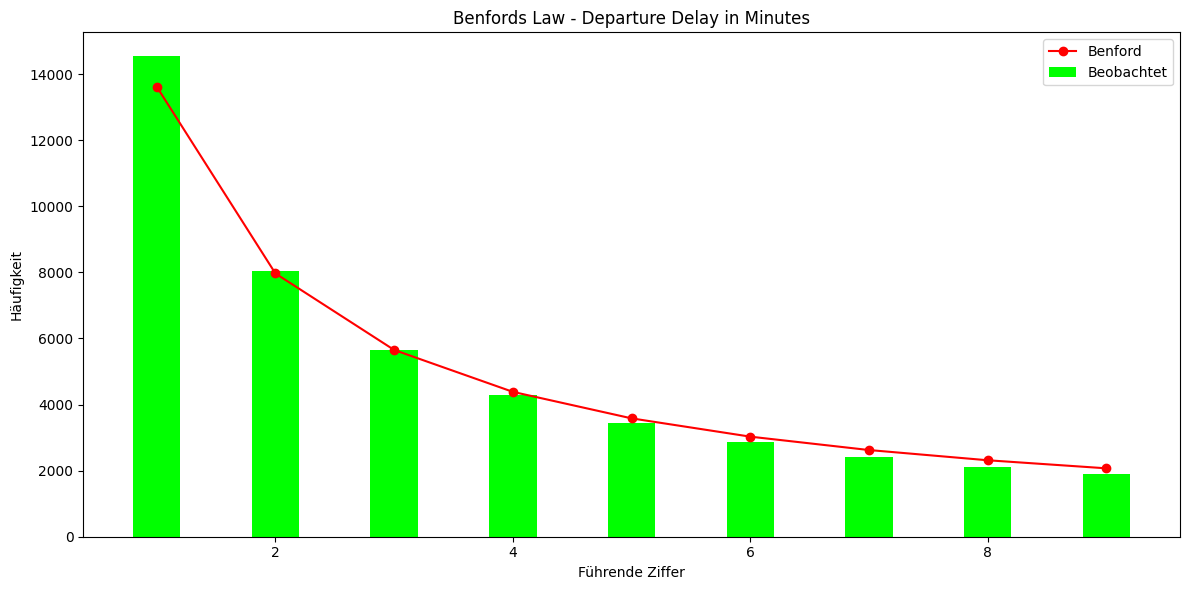

In [6]:
columns = ["Flight Distance","Age","Arrival Delay in Minutes", "Departure Delay in Minutes"] #Kardinale Variablen


for column in columns: # Schleife über die kardinalen Variablen

    # Datenvorbereitung: Entfernen von NaN und nicht-positiven Werten
    values = df[column].dropna()
    values = values[values > 0]

    # Extrahieren der führenden Ziffern
    leading = values.astype(str).str[0].astype(int)
    
    # Häufigkeiten der führenden Ziffern berechnen
    observed_counts = leading.value_counts().sort_index()
    
    # Benfordslaw Verteilungs erstellung
    benford = pd.Series({d: np.log10(1+1/d) for d in range(1,10)})* len(leading)

    # Farben basierend auf Abweichung von Benford
    colors = ["Lime" if abs(observed_counts[i]- benford[i])/ benford[i] < 0.1 else "Red" for i in range(1,10)]

    plt.figure(figsize=[12,6]) # Erstellen der Figur
    plt.bar(observed_counts.index ,observed_counts.values, width = 0.4, label = "Beobachtet", color = colors) # Balkendiagramm der beobachteten Häufigkeiten


    plt.plot(observed_counts.index  , benford, 'ro-' ,label = "Benford")# Liniendiagramm der Benford Verteilung
    plt.xlabel("Führende Ziffer") # X-Achsenbeschriftung
    plt.ylabel("Häufigkeit") # Y-Achsenbeschriftung
    plt.title(f"Benfords Law - {column}") # Titel des Plots
    plt.legend() # Legende anzeigen
    plt.tight_layout() # Layout anpassen
    plt.show() # Plot anzeigen


    """ 
    abweichungen = abs(observed_counts.values - benford.values)/ benford.values
    mittlere_abweichung =abweichungen.mean() * 100
    print(f"{mittlere_abweichung}")
    print(f"{abweichungen}")
    if mittlere_abweichung < 10:
        print("Folgt Benford")
    else:
        print("Folgt Benford nicht") """

# Ergebnisse: Folgen die Daten Benford?
Da eine Folge, die nicht exakt dem Benford-Gesetz entspricht streng genommen nicht wirklich folgen kann, haben wir vereinbart, dass wir eine folge als Benford-Konform betrachten, wenn die mittlere Abweichung unter 10 % liegt. Somit haben wir ein erstes Indiz dafür, dass unser Datensatz nicht manipuliert wurde und die Daten glaubwürdig sind.
## 1.Flight Distance
- Bei der Auswertung zeigt sich ein abnehmender Trend wie bei Benford, dieser ist jedoch zu Beginn deutlich schwächer ausgeprägt. Konkret betragt die Abweichung für die Zweite und dritte Ziffer 0.17 bzw 0,32.
## 2.Age
- Die Variable Age zeigt keinerlei Übereinstimmung mit Benfords Law und folgt eher einer Normalverteilung. Davon war von auszugehen, da die Altersverteilung natürlich nicht dem Benfords Law folgt.
## 3.Arrivel Delay in Minutes und 4.Departure Delay in Minutes
- Sowohl Arrival als auch Departure Delay folgen konsequent dem Benfords Law.


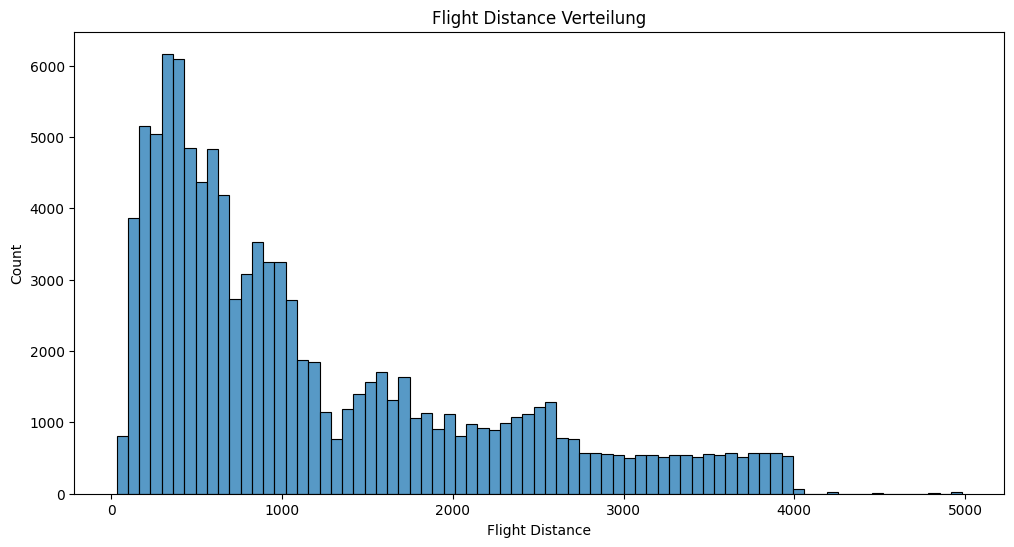

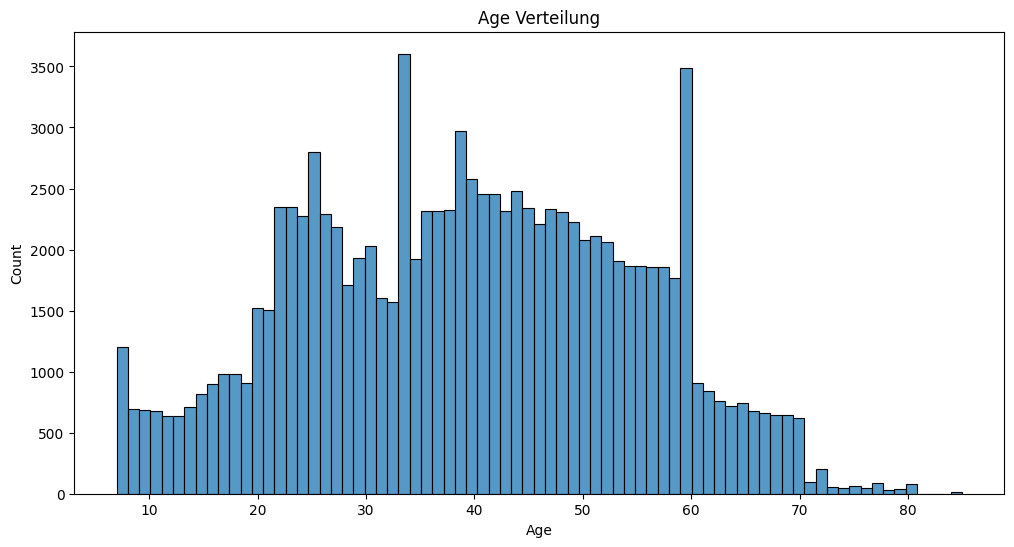

In [7]:
columns = ["Flight Distance","Age"] #Kardinale Variablen

for column in columns: # Schleife über die kardinalen Variablen
    plt.figure(figsize=[12,6]) # Erstellen der Figur
    sns.histplot(df[column], bins = 75) # Erstellen des Histogramms mit 75 Bins = 75 Balken
    plt.title(f"{column} Verteilung") # Titel des Plots
    plt.show() # Anzeigen des Plots

# Flight Distance
Aus dem Diagramm lässt sich herauslesen, dass ein großteil aller Flüge unter 1500 Meilen hat. Flugdistanzen darüber hinaus sind noch relativ häufig bis ca 4000 Meilen. Längere Flüge sind selten.



# Age Verteilung
Auffallend ist, dass es einige Bewertungen von unter 10 Jährigen gibt und generell einige Bewertungen von Minderjährigen.
Der großteil der Beobachteten liegt zwischen 20 und 60. Danach gibt es noch einige Beurteilungen von Menschen bis ca 70 welche Mengenteschnisch passend zur Menge der Bewertungen von Minderjährigen. Bewertungen von über 70 Jährigen sind vergleichsweise unwichtig.

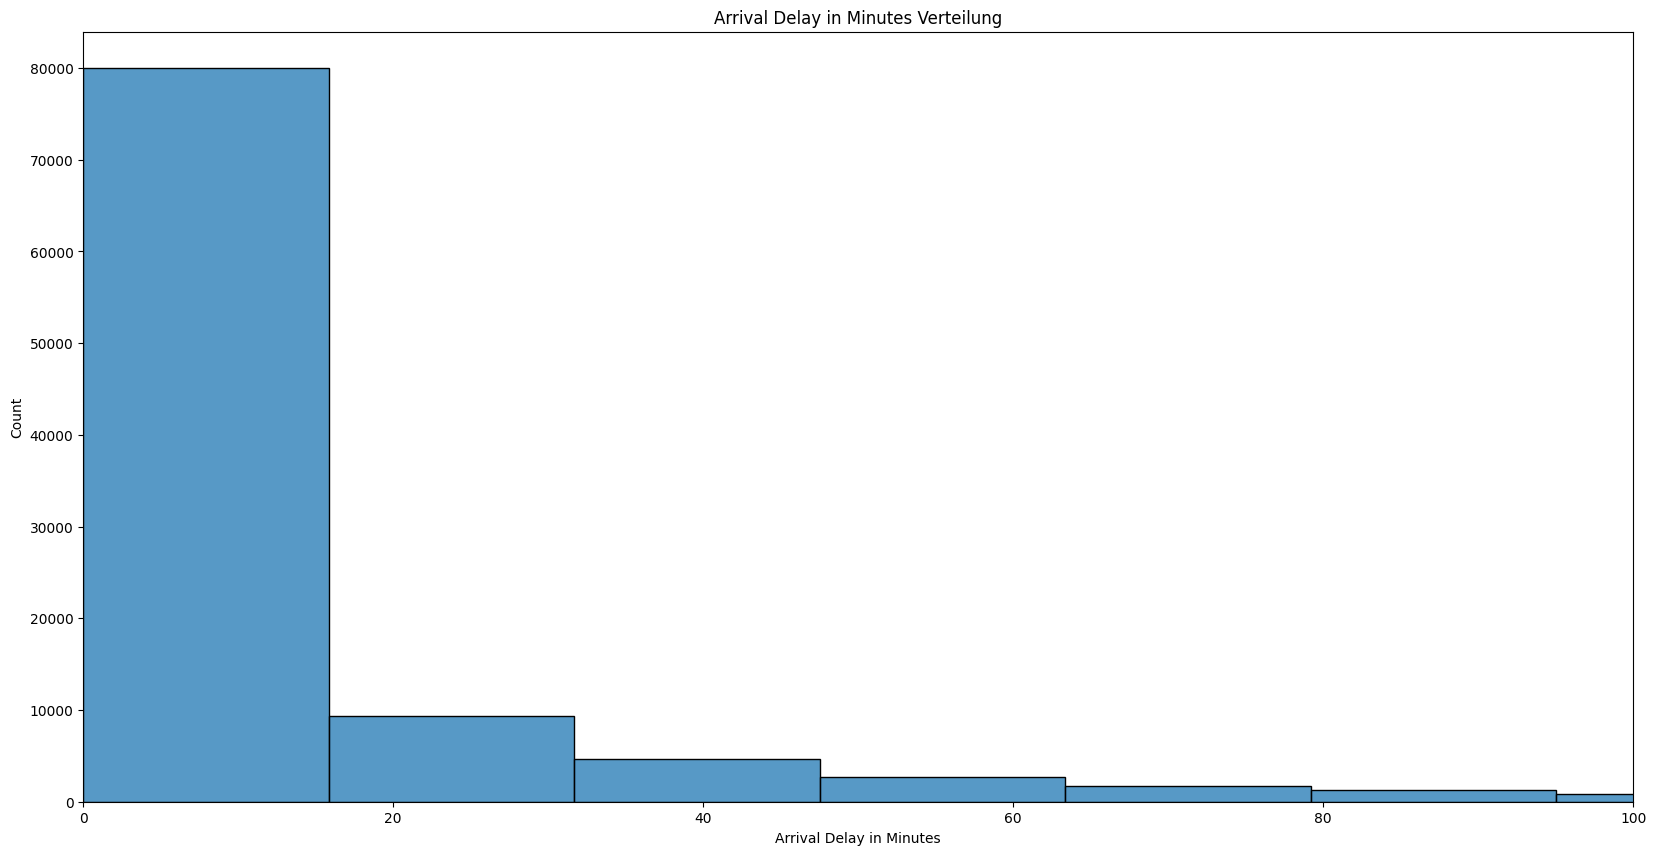

In [8]:
columns = ['Arrival Delay in Minutes'] #Kardinale Variablen

for column in columns: # Schleife über die kardinalen Variablen
    plt.figure(figsize=[20,10]) # Erstellen der Figur
    sns.histplot(df[column], bins = 100) # Erstellen des Histogramms mit 100 Bins = 100 Teilen
    plt.title(f"{column} Verteilung") # Titel des Plots
    plt.xlim(0, 100)  # Setzen der x-Achsen-Grenzen
    plt.show() # Anzeigen des Plots

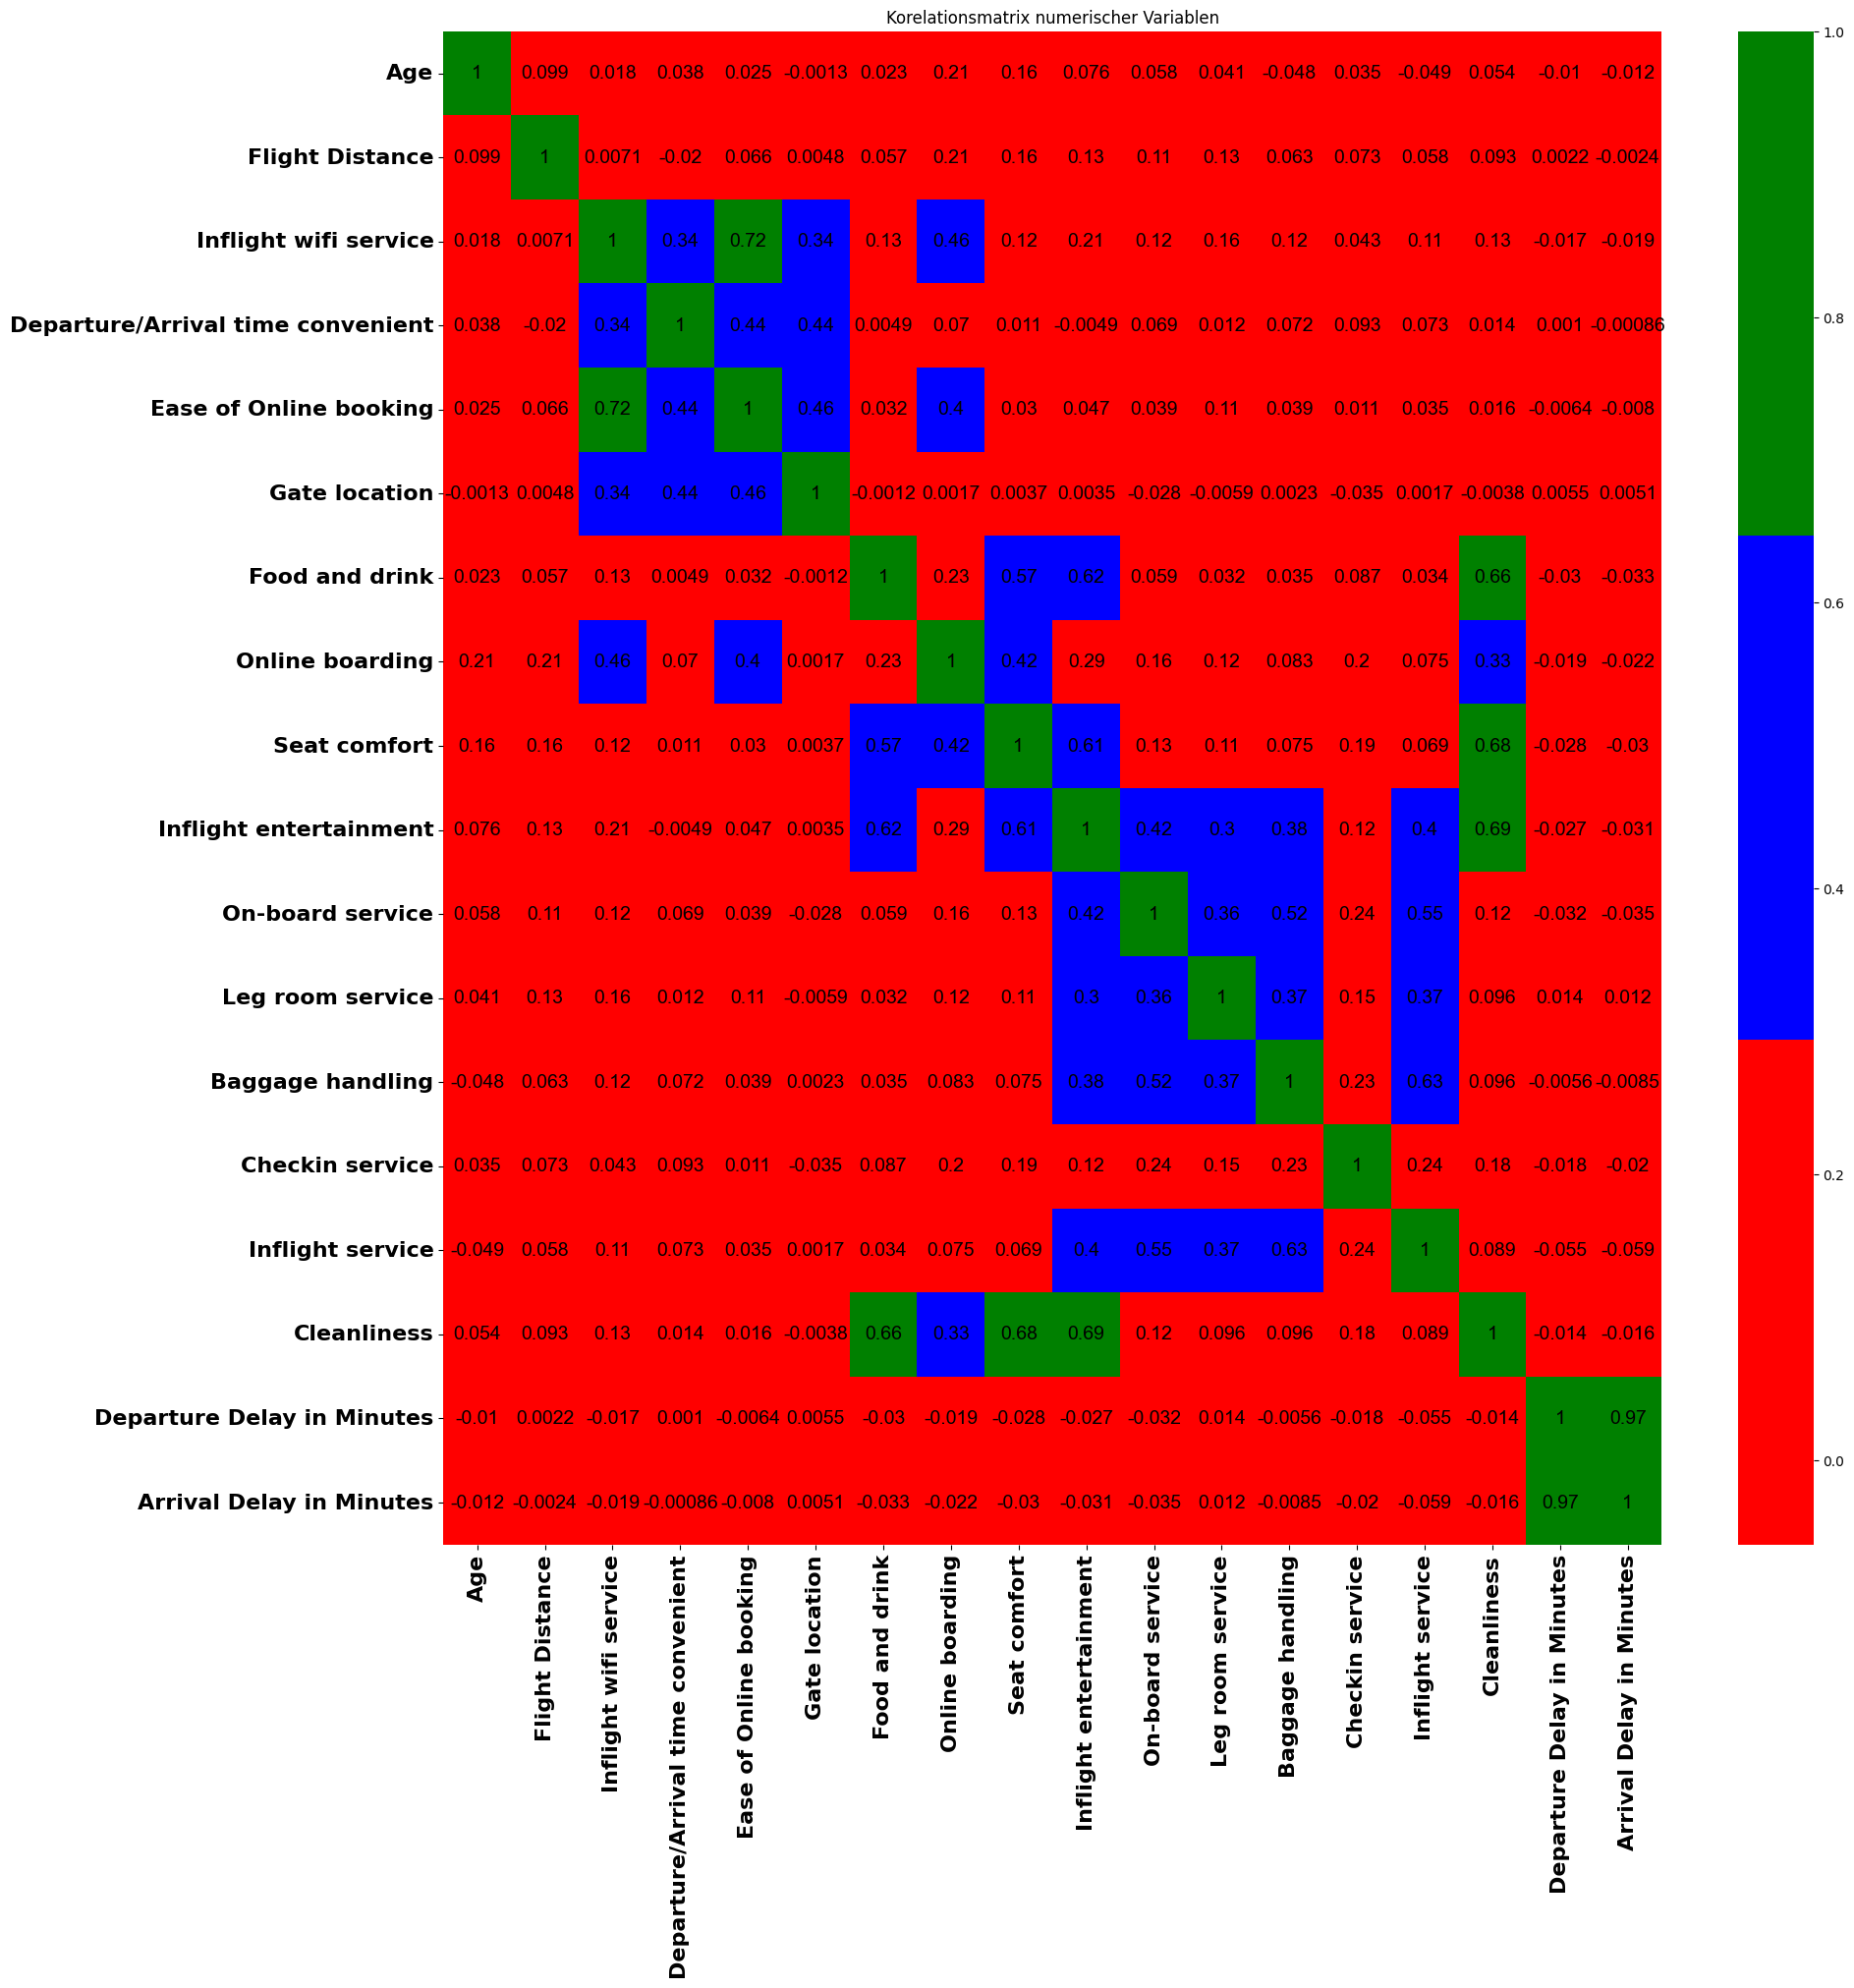

In [9]:
num_cols = df.select_dtypes(include= np.number).columns.drop(["id","Unnamed: 0"]) # Numerische Variablen auswählen, id und Unnamed: 0 ausschließen
corr = df[num_cols].corr() # Korrelationsmatrix berechnen
plt.figure(figsize=[20,20]) # Erstellen der Figur, Größe 20x20
sns.heatmap(corr, annot = True, cmap = ["Red","Blue","Green"], annot_kws={"size": 14, "fontname": "Arial", "color": "black"}) # Heatmap der Korrelationsmatrix
plt.title("Korelationsmatrix numerischer Variablen") # Titel des Plots


# Achsenbeschriftungen größer machen
plt.xticks(fontsize=16, fontweight="bold", rotation=90)
plt.yticks(fontsize=16, fontweight="bold", rotation=0)

plt.show() # Anzeigen des Plots

#TODO: Matrix Beschreibeung

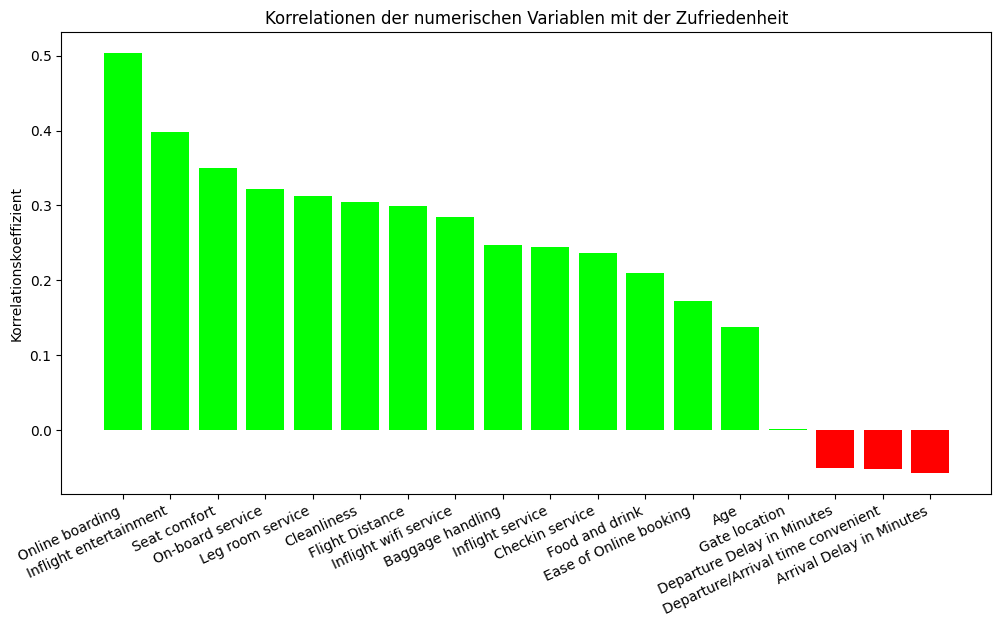

In [10]:
satisfaction_map = { # Mapping der Zufriedenheitswerte zu numerischen Werten
    "neutral or dissatisfied": 0, # Neutral oder unzufrieden wird zu 0
    "satisfied":1 # Zufrieden wird zu 1
}
numeric_df= df.select_dtypes(include= ['int64', 'float64']).drop(columns=['id','Unnamed: 0']) # Numerische Variablen auswählen und id, Unnamed: 0 entfernen




correlations = numeric_df.corrwith(df["satisfaction"].map(satisfaction_map)).sort_values(ascending= False) # Korrelationen mit Zufriedenheit berechnen und sortieren

colors = ['lime' if v > 0 else 'red' for v in correlations] # Farben basierend auf positiver oder negativer Korrelation
#print(correlations)

sum = 0

""" for val1, val2 in enumerate(correlations):
    sum += val2
print(sum) """


plt.figure(figsize = [12,6]) # Erstellen der Figur
plt.bar(correlations.index, correlations, color = colors) # Balkendiagramm der Korrelationen
plt.xticks(rotation = 25, ha = "right") # X-Achsenbeschriftungen drehen
plt.ylabel("Korrelationskoeffizient") # Y-Achsenbeschriftung
plt.title("Korrelationen der numerischen Variablen mit der Zufriedenheit") # Titel des Plots
plt.show()

# Ergebnisse
## Positive Korelationen
- Als beste Korelation lässt sich Online Boarding anführen mit einem Koeffizenten von ca. 0.5 was daraufhin deutet, dass es keine gute Korelation gibt.

## Negative Korelationen
- Arrivel / Departure Delay korrelieren gegenteilig mit satisfaction, was bedeutet, dass sie bei erhöhung dazu führen, dass Menschen eher unsatisfied oder neutral or dissatified angeben.

In [11]:
columns = ["Arrival Delay in Minutes"] #Kardinale Variablen
size_column = "Departure/Arrival time convenient" # Größenspalte für die Punkte
for column in columns: # Schleife über die kardinalen Variablen
    fig = px.scatter(df,x=column,y='Age',color='satisfaction', size=size_column, width=800, height=600) # Erstellen des Scatterplots
    fig.show() # Anzeigen des Plots

## Ergebnis 
Die Visualisierung bestätigt die Vermutung, dass die Zufriedenheit mit zunehmender Verspätung stark abfällt. Zwar gibt es vereinzelt Passagiere, die trotz hoher Verspätung zufrieden bleiben, doch diese bilden die Ausnahme.

Betrachtet man zusätzlich das Alter fällt auf, dass sehr junge sowie sehr alte Passagiere eine geringere Toleranzgrenze haben. In diesen Gruppen kippt die Stimmung tendenziell bereits nach deutlich kürzeren Wartezeiten in Unzufriedenheit um, während die Altersgruppe mittleren Alters (ca. 30–60 Jahre) etwas geduldiger erscheint.

Für diese Analyse haben wir uns auf die Variable Arrival Delay beschränkt, da zwischen Ankunfts - und Abflugverspätung (Departure Delay) eine Korrelation von 97 % besteht und beide Variablen somit nahezu identische Informationen liefern.

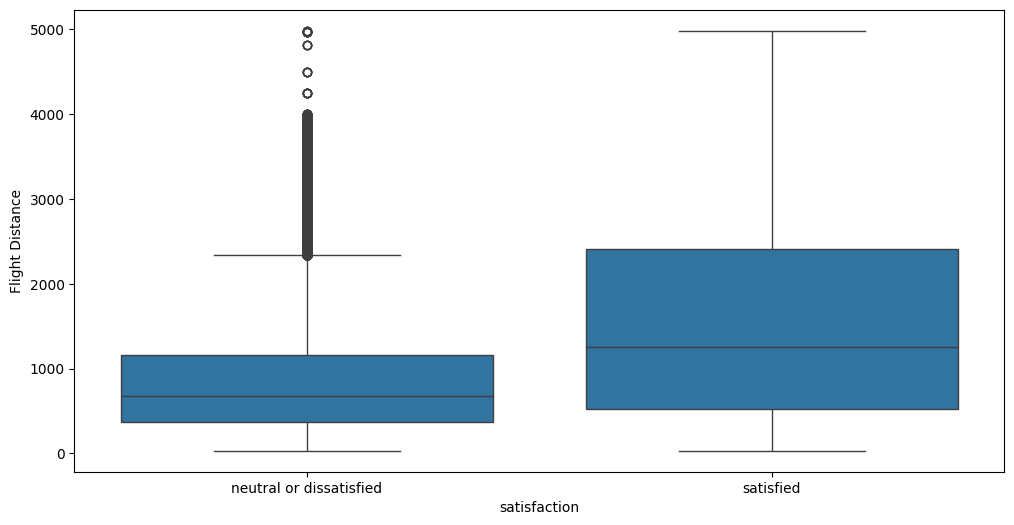

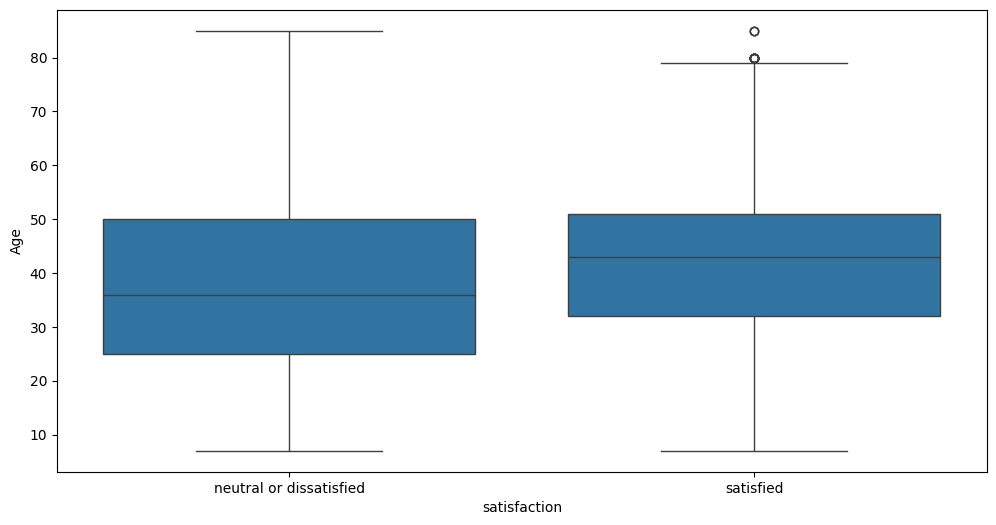

In [12]:
list_service_vars = ["Flight Distance",'Age'] #Liste der Servicevariablen
for var in list_service_vars: # Schleife über die Servicevariablen
    plt.figure(figsize = [12,6]) # Erstellen der Figur
    sns.boxplot(df, x= 'satisfaction', y=var) # Erstellen des Boxplots
    plt.show() # Anzeigen des Plots

# Flight Distance
Die Flugdistanz erwies sich als starker Indikator für die Zufriedenheit. Unzufriedenheit tritt massiv gehäuft auf Kurzstreckenflügen auf (niedriger Median). Im Gegensatz dazu steigt die Chance auf zufriedene Kunden bei Langstreckenflügen signifikant an.

# Age
Es zeigt sich ein deutlicher Zusammenhang zwischen Alter und Zufriedenheit. Zufriedene Passagiere sind im Durchschnitt („Median“) deutlich älter (ca. 40–45 Jahre) als neutrale oder unzufriedene Passagiere (ca. 26–30 Jahre). Dies deutet darauf hin, dass jüngere Zielgruppen kritischer sind oder andere Ansprüche an das Reiseerlebnis stellen.

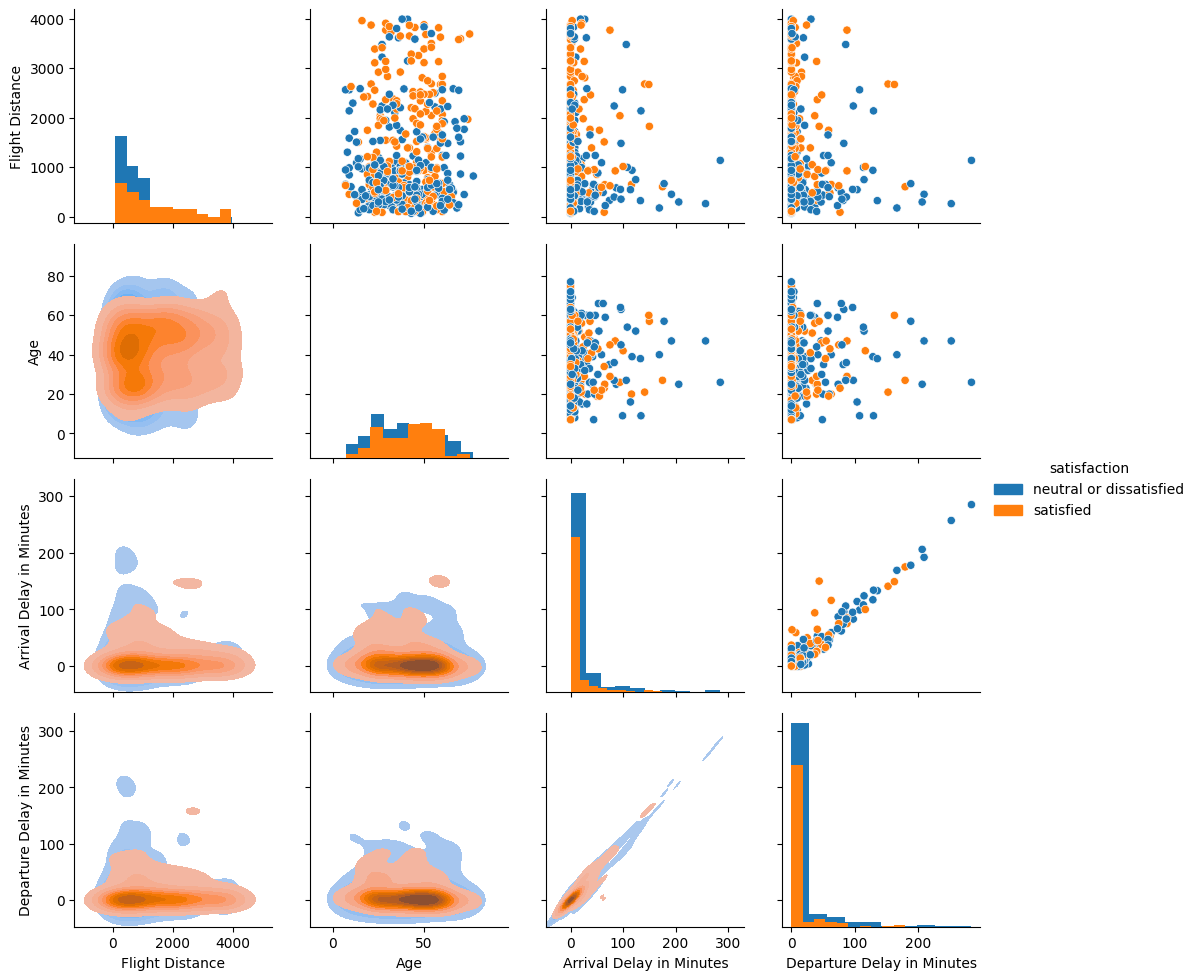

In [13]:
columns = ["Flight Distance","Age","Arrival Delay in Minutes", "Departure Delay in Minutes"] #Kardinale Variablen
sample_df = df.sample(n=500, random_state=42) # Zufällige Stichprobe von 500 Zeilen für die PairGrid-Visualisierung

giant_grid = sns.PairGrid(sample_df, hue = "satisfaction", vars = columns) # Erstellen des PairGrid
giant_grid.map_diag(plt.hist) # Erstellen der Histogramme auf der Diagonalen
giant_grid.map_upper(sns.scatterplot) # Erstellen der Scatterplots im oberen Dreieck
giant_grid.map_lower(sns.kdeplot, fill = True) # Erstellen der KDE-Plots im unteren Dreieck
giant_grid.add_legend() # Legende hinzufügen
plt.show() # Anzeigen des Plots

## Letztes Plot
Dieses umfangreiche Pairplot bietet die Möglichkeit, mehrere unserer vorherigen Darstellungen wiederzuerkennen und alle relevanten Variablen noch einmal kompakt auf einen Blick zu betrachten. Besonders der KDE-Plot im unteren Dreieck liefert einen zusätzlichen Mehrwert: Durch die Dichtevisualisierung werden Überlagerungen und Muster deutlich erkennbarer als in reinen Scatterplots. Bereiche mit hoher Datendichte lassen sich so leichter identifizieren.

Zusammenfassend lässt sich sagen, dass dieses Plot vor allem als Übersichts- und Orientierungsinstrument sinnvoll ist. Es greift viele zuvor gezeigte Zusammenhänge erneut auf, jedoch in einer Form, die eher einen globalen Überblick erlaubt. Für die Analyse einzelner Werte oder feiner Details ist es weniger geeignet, da die Vielzahl der Datenpunkte die exakte Betrachtung erschwert.